# KNN Assignment-1 
Table of Contents
Introduction
Data Exploration
2.1 Descriptive Analysis
Exploratory Data Analysis
Data Pre-Processing
How to choose the value for K?
5.1 Grid search for choosing the best Value of K
5.2 Visualizing the CV results
Applying KNN
6.1 Predictions and Evaluations
6.2 Applying KNN using K=3
6.3 Applying KNN using K=5

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
###-- EDA---
df.shape

(101, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
df.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


In [7]:
list(df)

['animal name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

In [8]:
h1 = ['animal name', 'hair', 'feathers', 'eggs', 'milk','airborne','aquatic','predator','toothed',
      'backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']

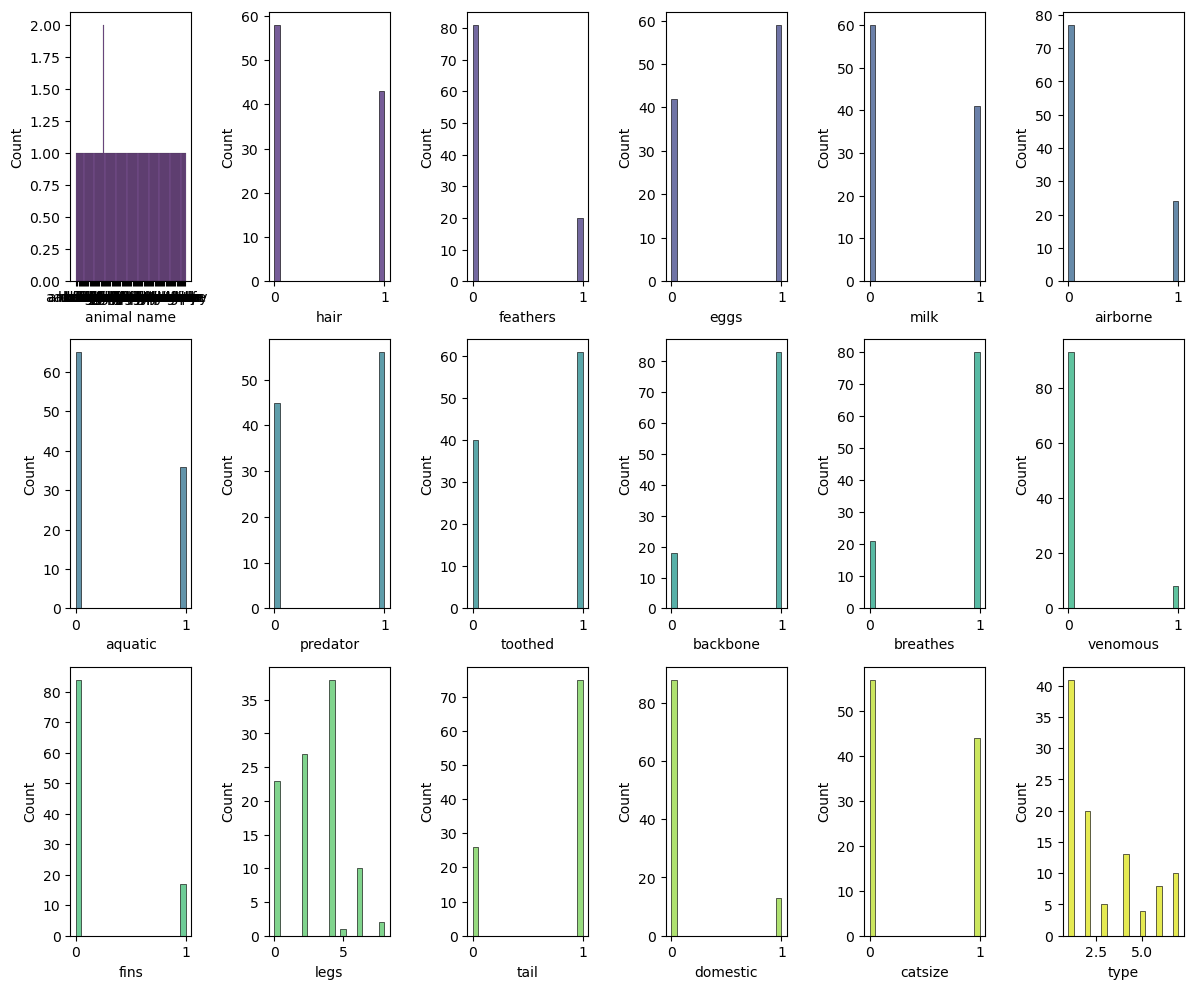

In [9]:
##--Histogram----###
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(12,10))
colors = sns.color_palette('viridis', n_colors=len(h1))
for i, (variable, color) in enumerate(zip(h1, colors)):
    sns.histplot(data=df, x=variable, ax=axes[i // 6, i % 6], color=color, bins=20)
plt.tight_layout()
plt.show()


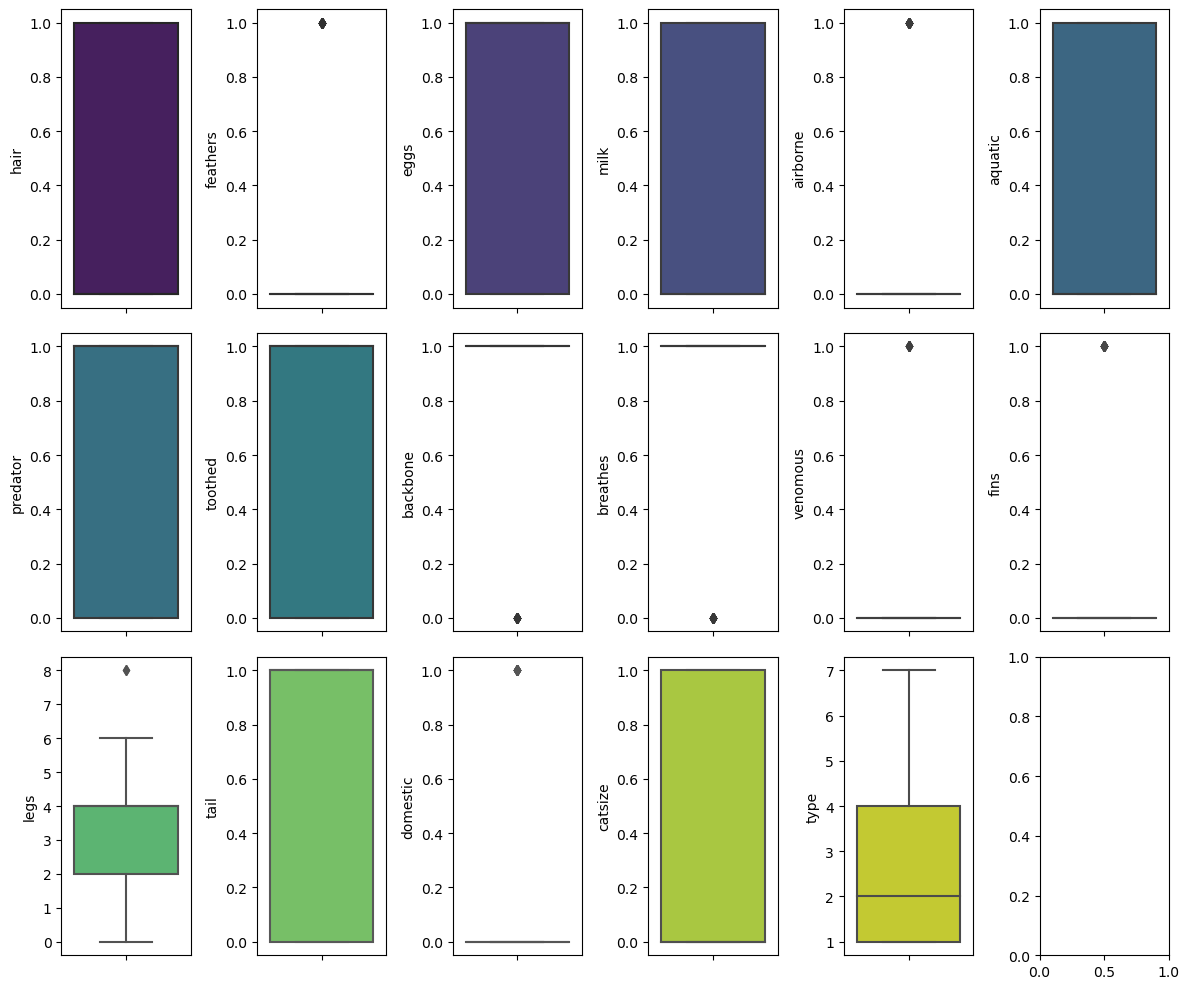

In [11]:
##-- Boxplot---###
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(12, 10))
h1 = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed',
      'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
colors = sns.color_palette('viridis', n_colors=len(h1))
for i, (variable, color) in enumerate(zip(h1, colors)):
    sns.boxplot(data=df, y=variable, ax=axes[i // 6, i % 6], color=color)
plt.tight_layout()
plt.show()

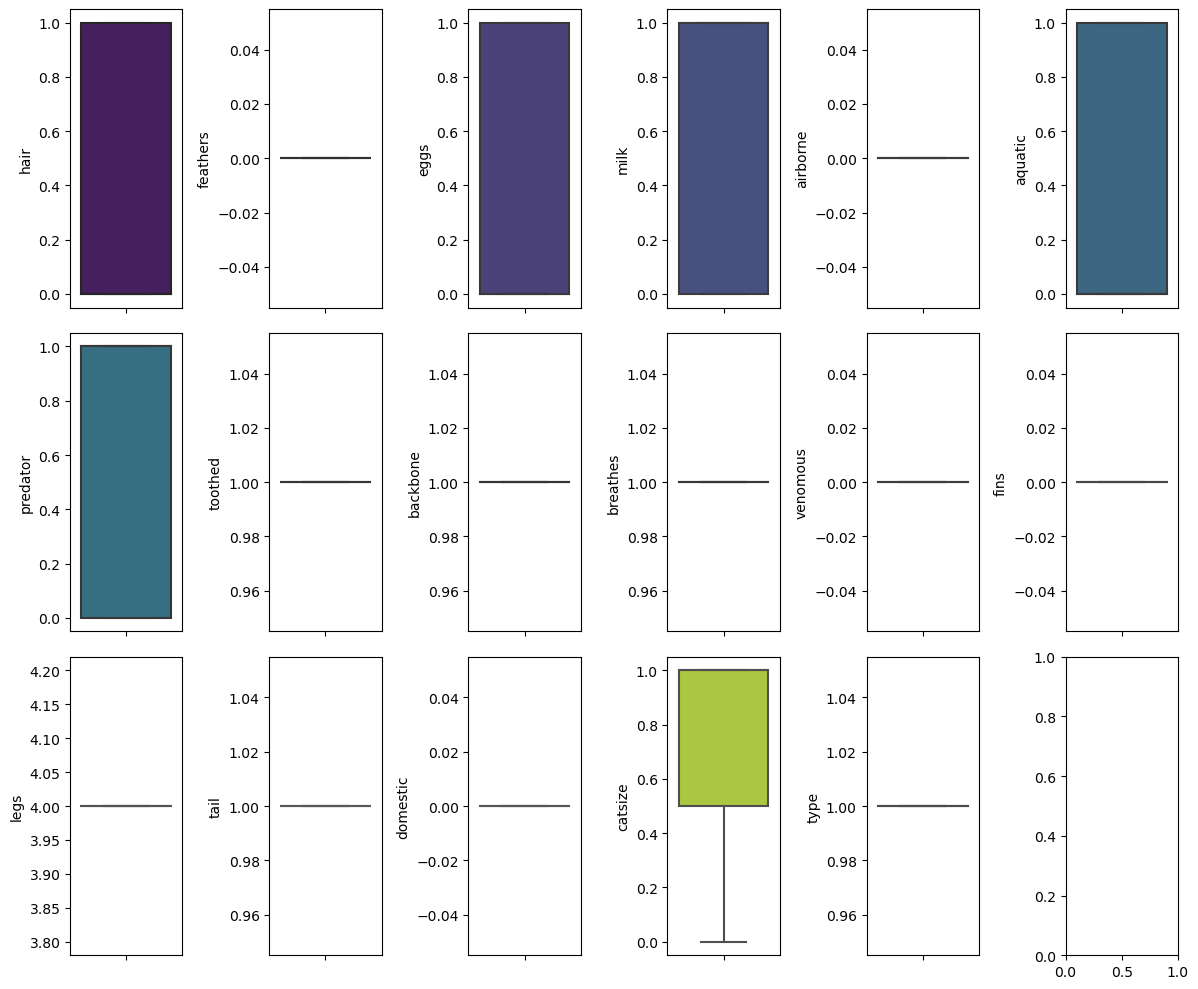

In [12]:
## -- Out liers--calculation--##
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(12, 10))
h1 = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed',
      'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
colors = sns.color_palette('viridis', n_colors=len(h1))
df_copy = df.copy()
for i, (variable, color) in enumerate(zip(h1, colors)):
    Q1 = df_copy[variable].quantile(0.25)
    Q3 = df_copy[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_copy = df_copy[(df_copy[variable] >= lower_bound) & (df_copy[variable] <= upper_bound)]
    sns.boxplot(data=df_copy, y=variable, ax=axes[i // 6, i % 6], color=color)
plt.tight_layout()
plt.show()


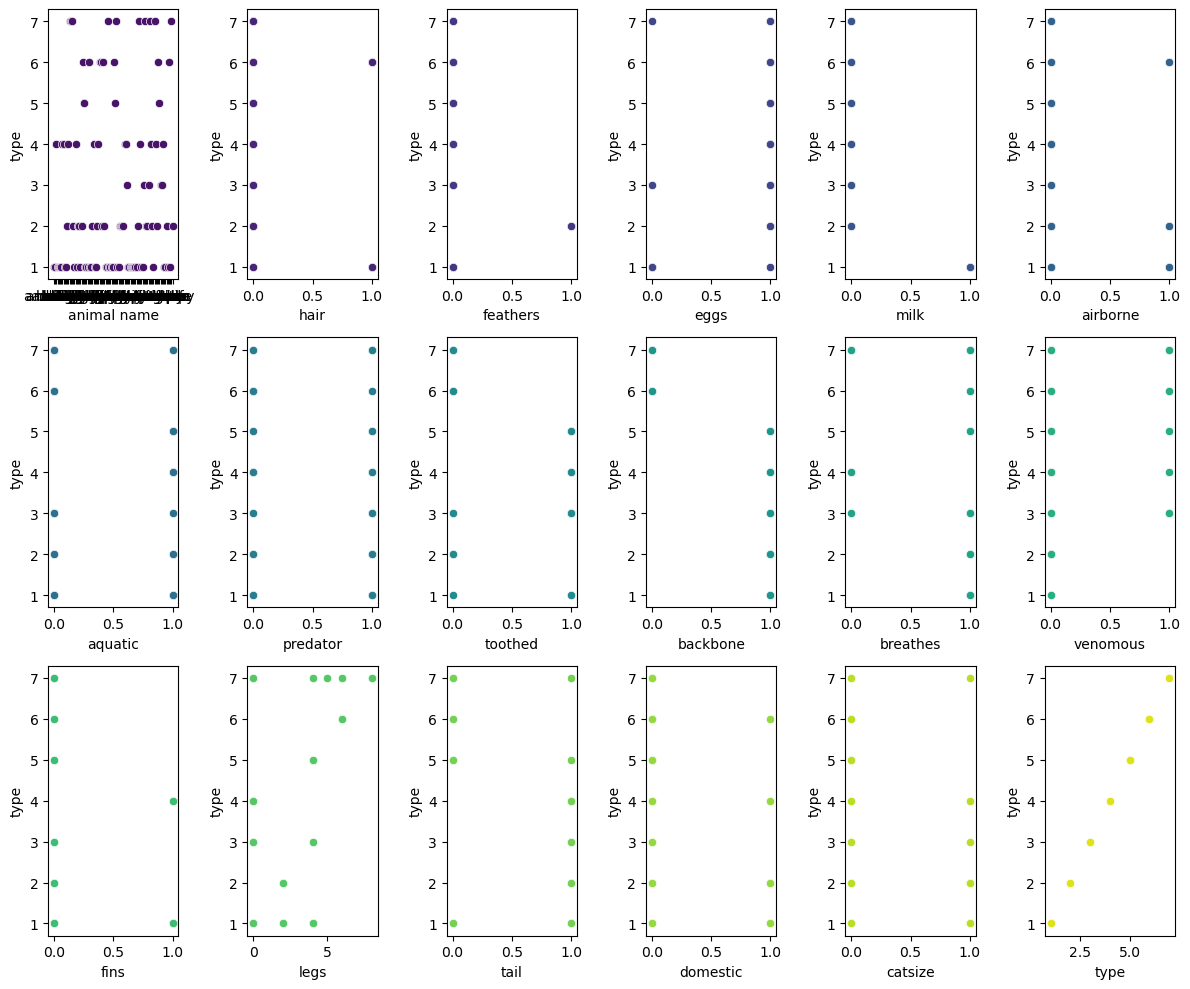

In [13]:
### ---Scatter plot---
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(12,10))
h1 = ['animal name', 'hair', 'feathers', 'eggs', 'milk','airborne','aquatic','predator','toothed',
      'backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']
colors = sns.color_palette('viridis', n_colors=len(h1))
for i, (variable, color) in enumerate(zip(h1, colors)):
    sns.scatterplot(data=df, x=variable, y='type', ax=axes[i // 6, i % 6], color=color)
plt.tight_layout()
plt.show()

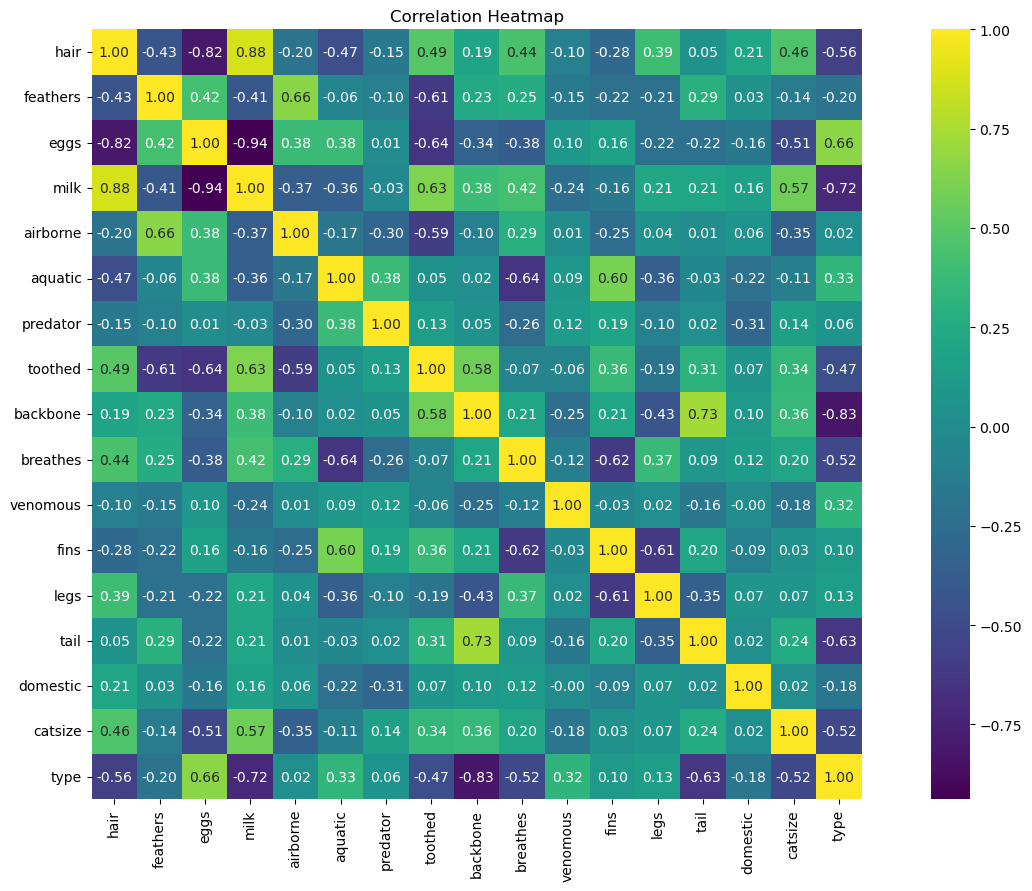

In [14]:
###-- Heat map---##
df_subset = df[h1]
corr_matrix = df_subset.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

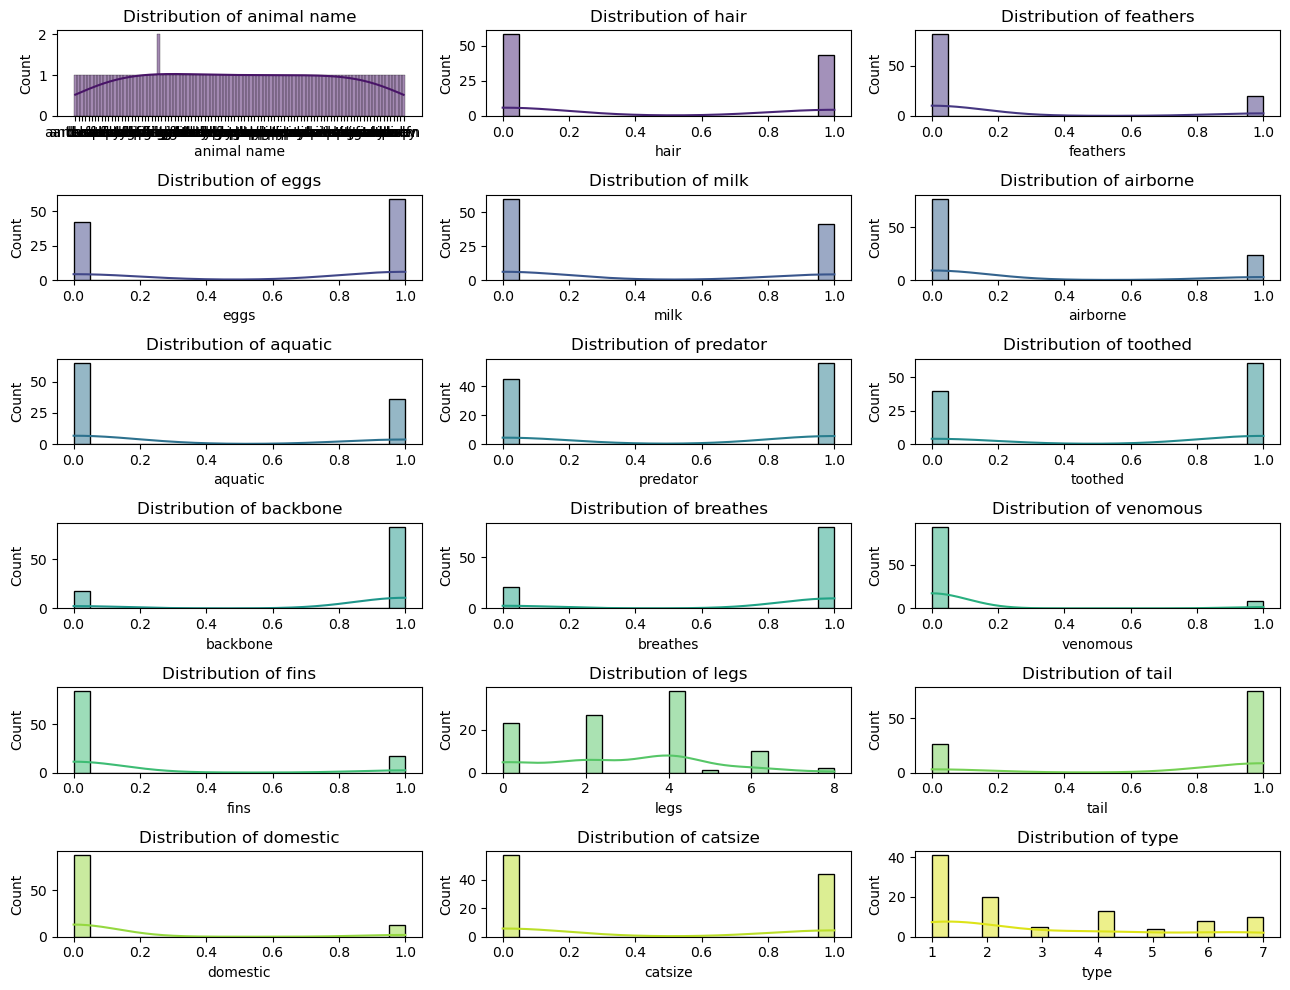

In [15]:
##-- Distribution plot--##
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(13,10))
axes = axes.flatten()
for i, (variable, color) in enumerate(zip(h1, colors)):
    sns.histplot(df[variable], kde=True, ax=axes[i], color=color, bins=20)
    axes[i].set_title(f'Distribution of {variable}')
plt.tight_layout()
plt.show()

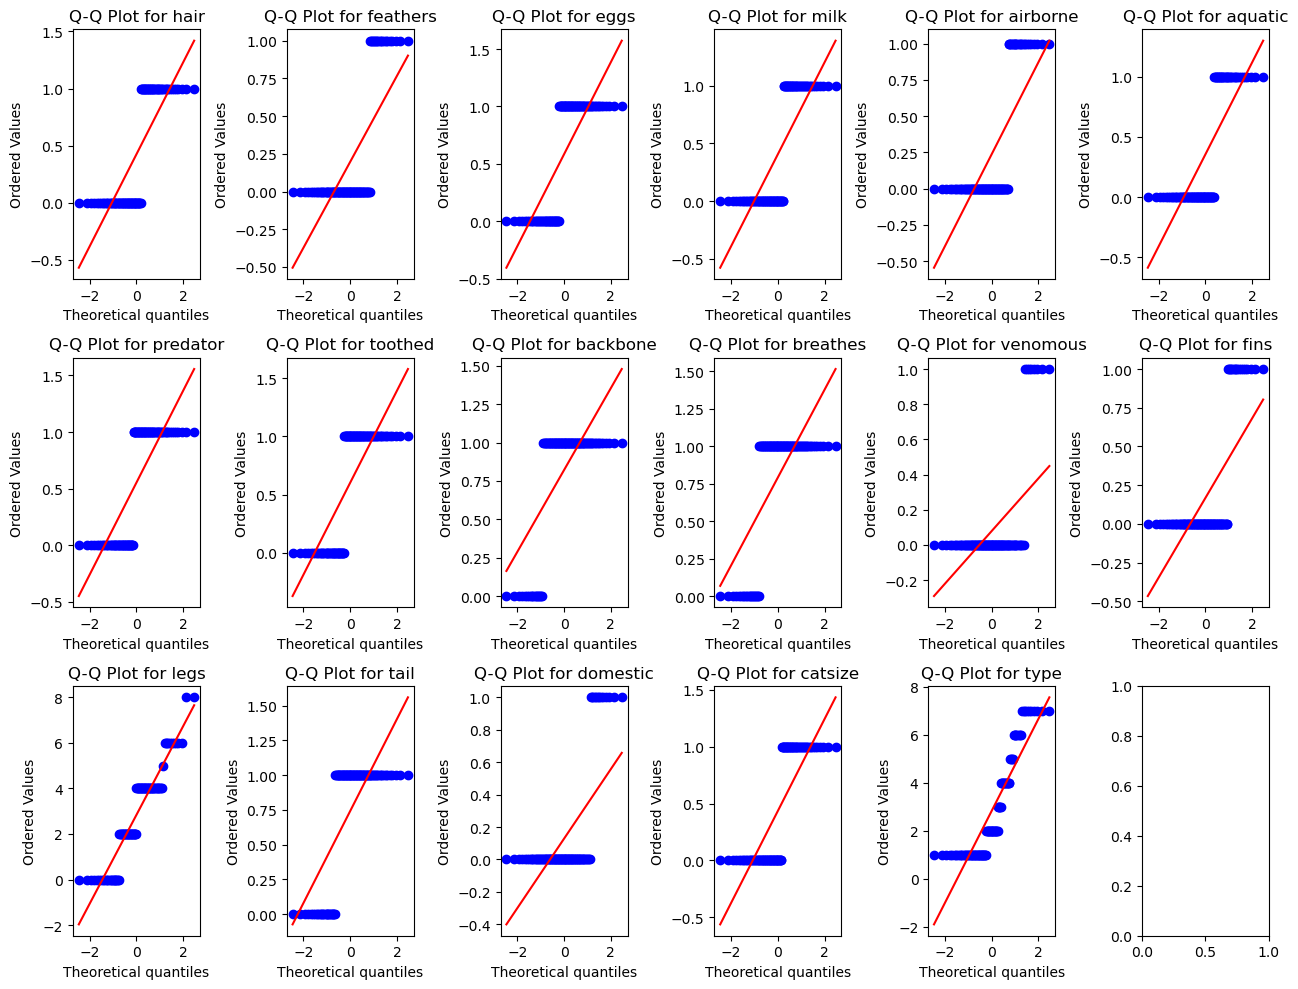

In [16]:
###--Q-Q-Plot--###

qqplot = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed',
          'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(13,10))
axes = axes.flatten()
for i, column in enumerate(qqplot):
    # Check for missing values
    if df[column].isnull().any():
        print(f"Warning: {column} contains missing values. Please handle them before plotting.")
    else:
        stats.probplot(df[column], dist="norm", plot=axes[i])
        axes[i].set_title(f'Q-Q Plot for {column}')
plt.tight_layout()
plt.show()


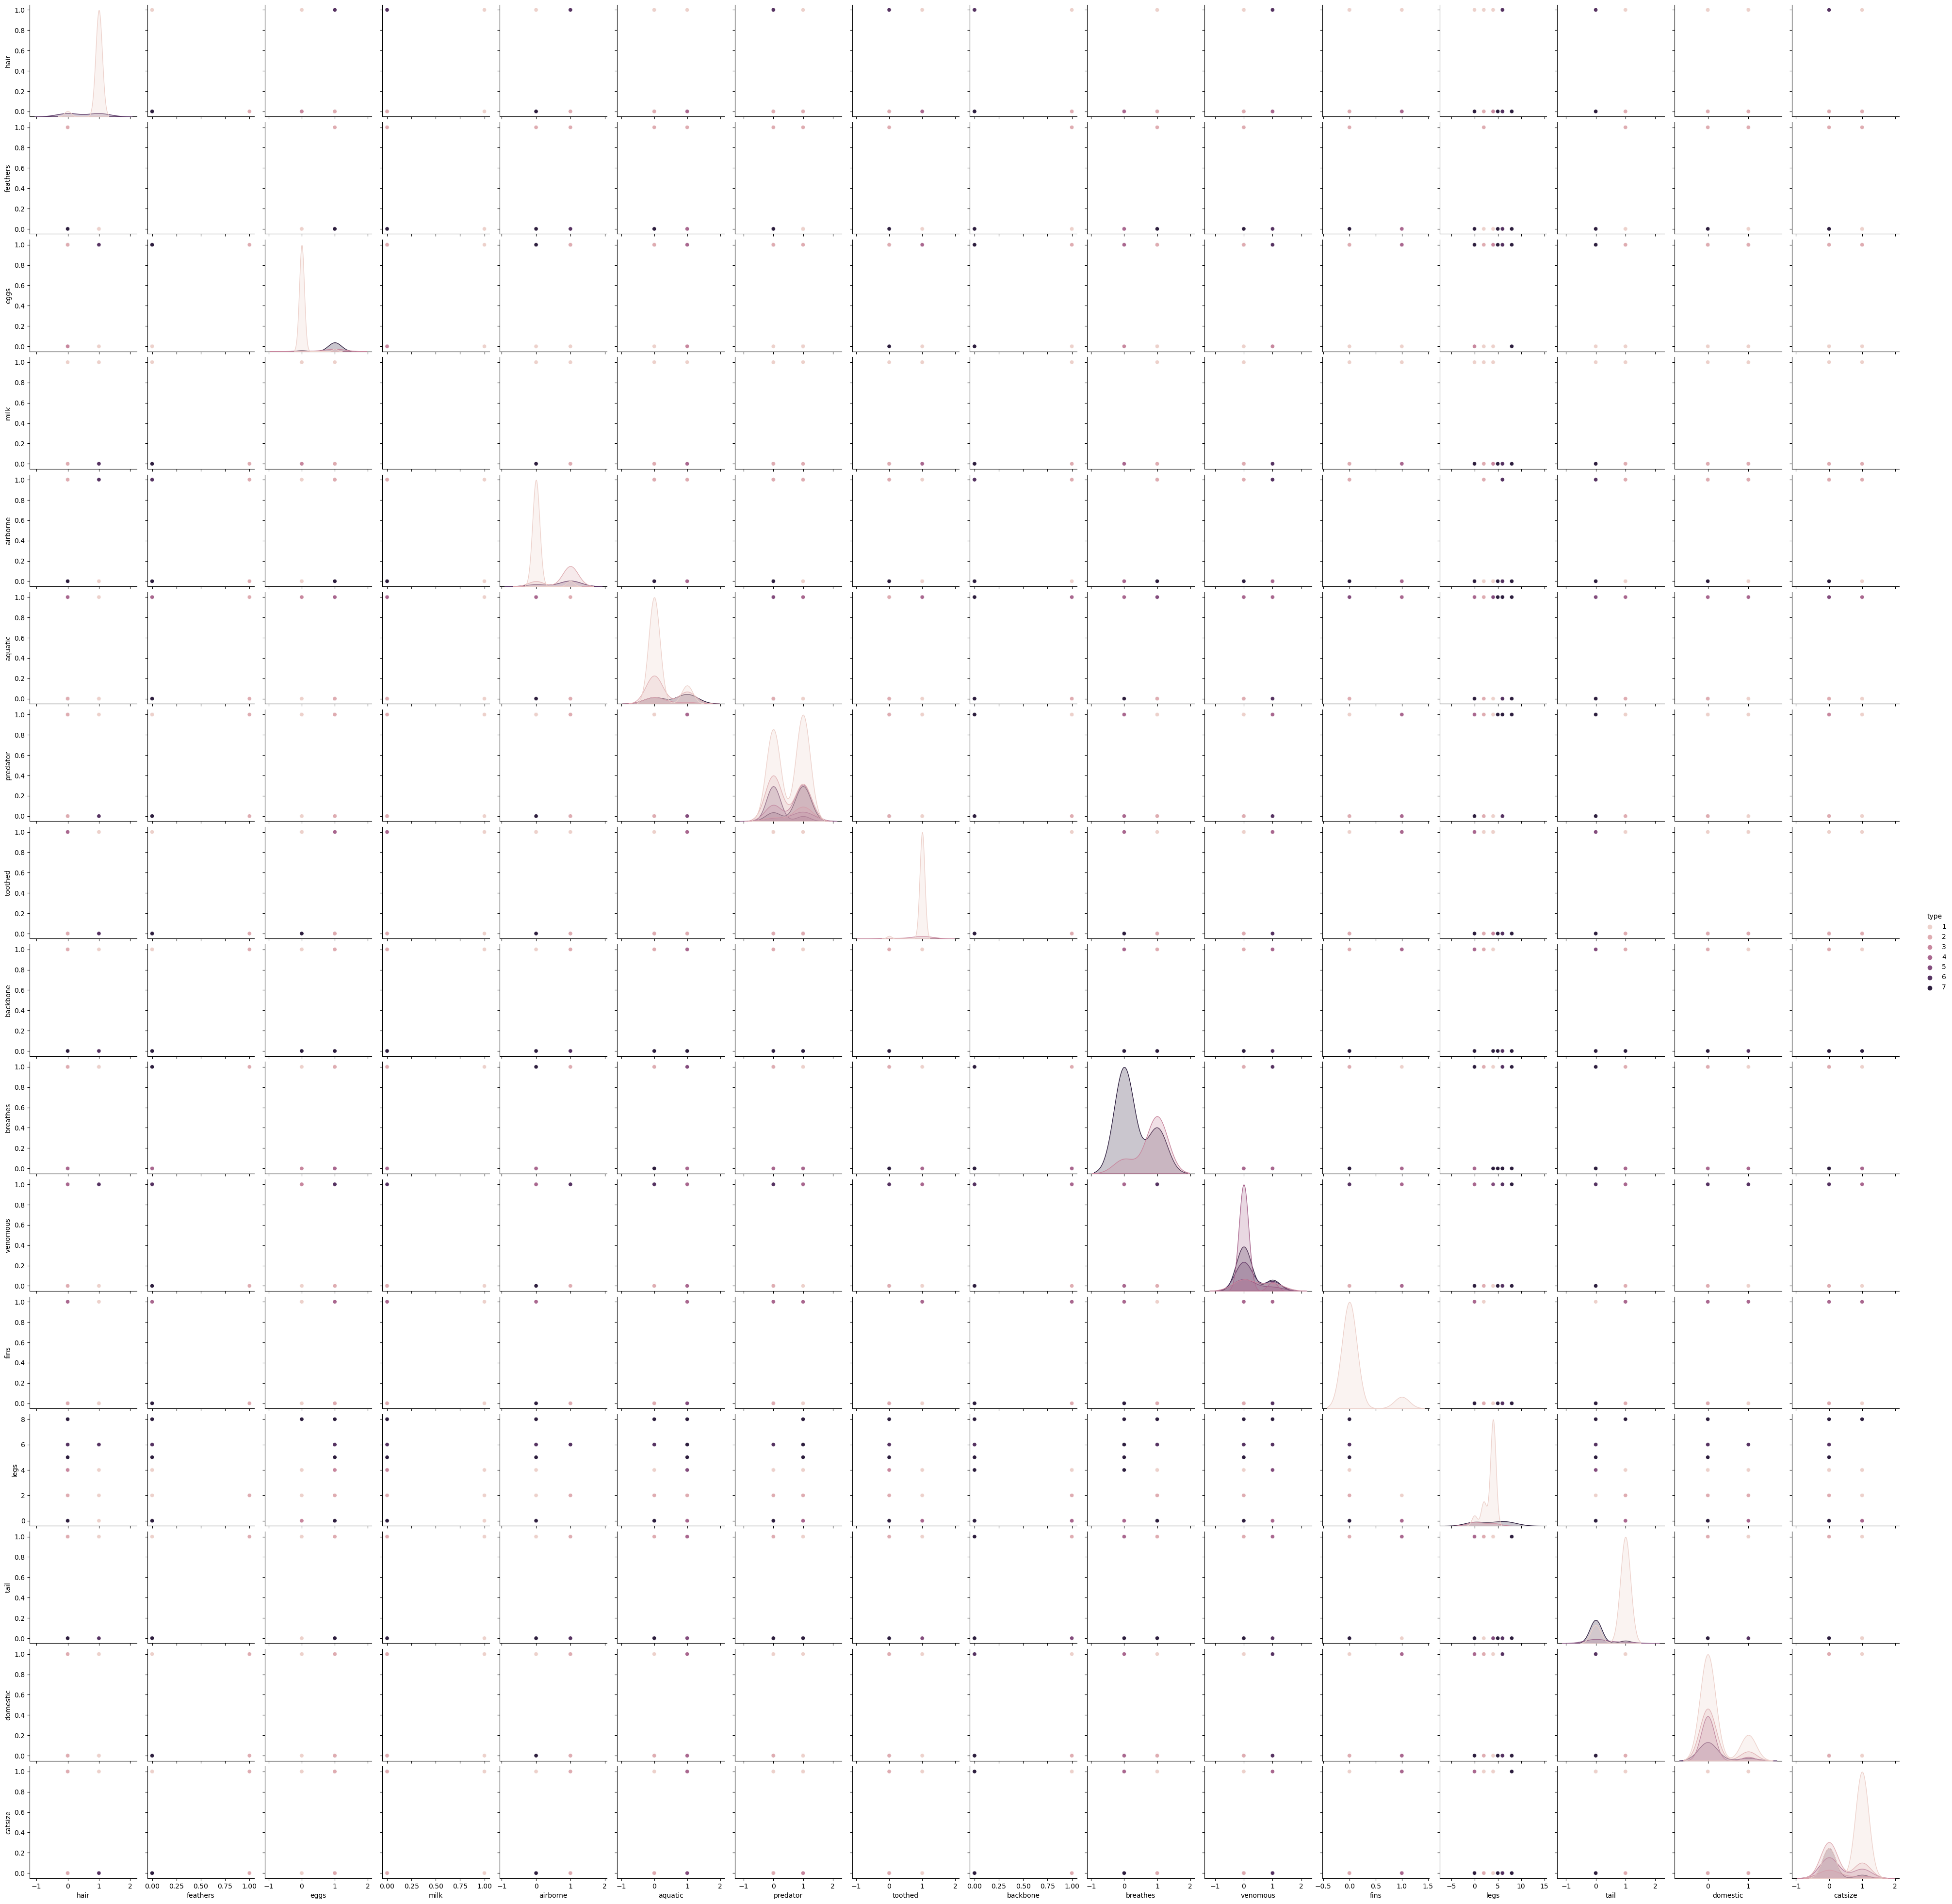

In [17]:
###--Pair-plot--##
sns.pairplot(df,hue='type')
plt.show()

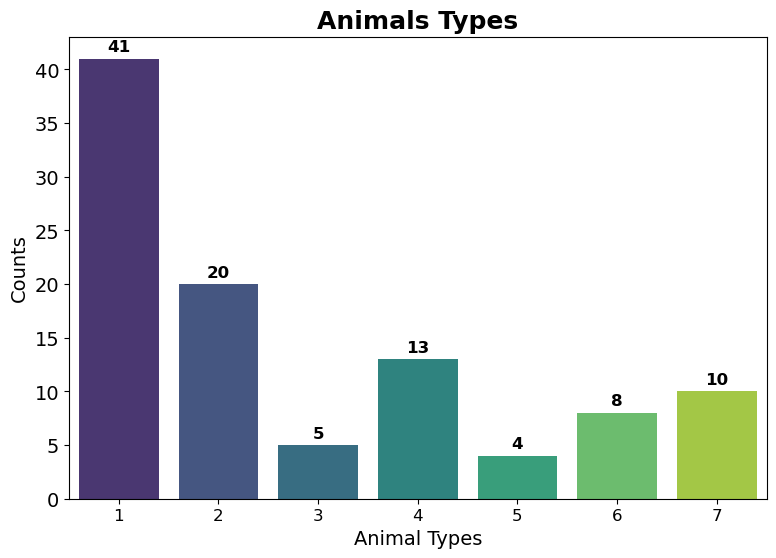

In [18]:
##-- Bar-plot
plt.figure(figsize=(9, 6))
ax = sns.barplot(x=df['type'].value_counts().index.tolist(), y=df['type'].value_counts().tolist(),palette='viridis')
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.title("Animals Types", fontsize=18, fontweight='bold')
plt.xlabel('Animal Types', fontsize=14)
plt.ylabel('Counts', fontsize=14)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12, color='black', weight='bold', padding=3)
plt.show()

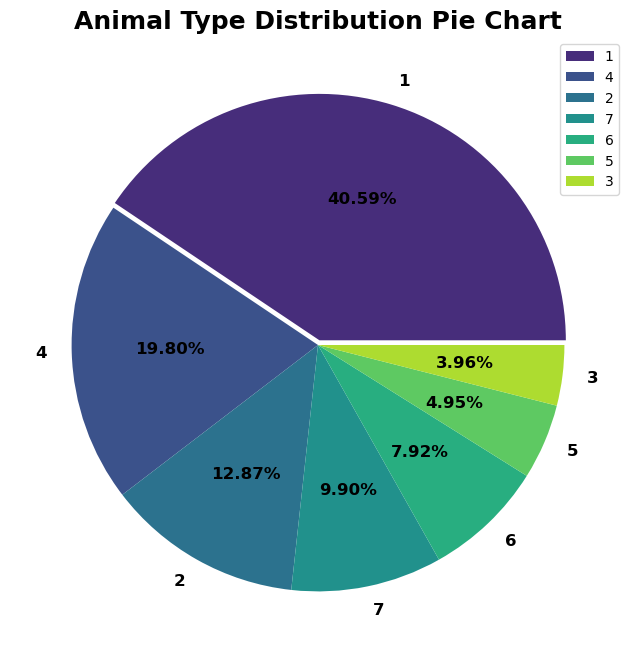

In [19]:
##--pie chart--
plt.figure(figsize=(8, 8))
plt.pie(df['type'].value_counts(), labels=df['type'].unique(),
        explode=[0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        autopct='%.2f%%', textprops={'size': 'large', 'fontweight': 'bold'},
        colors=sns.color_palette('viridis', n_colors=len(df['type'].unique())))
plt.legend(loc='upper right')
plt.title("Animal Type Distribution Pie Chart", fontsize=18, fontweight='bold')
plt.show()

In [20]:
## Label Encoding --###

Le=LabelEncoder()
df['animal name']=Le.fit_transform(df['animal name']) 

In [21]:
# Assuming 'X & Y Variables
y = df['type']
x = df.drop('type', axis=1)

In [22]:
print(y)
print(x)

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64
     animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0              0     1         0     0     1         0        0         1   
1              1     1         0     0     1         0        0         0   
2              2     0         0     1     0         0        1         1   
3              3     1         0     0     1         0        0         1   
4              4     1         0     0     1         0        0         1   
..           ...   ...       ...   ...   ...       ...      ...       ...   
96            95     1         0     0     1         0        0         0   
97            96     1         0     1     0         1        0         0   
98            97     1         0     0     1         0        0         1   
99            98     0         0     1     0         0        0         0   
100           99

In [23]:
### KNN Classifier

K1_train=[]
K1_test=[]
x = np.array(x)
y = np.array(y)

In [24]:
###---K=1
KNN = KNeighborsClassifier(n_neighbors=1)

training_accuracy = []
test_accuracy = []

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    KNN.fit(x_train, y_train)
    y_pred_train = KNN.predict(x_train)
    y_pred_test = KNN.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))
     
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))

Average training accuracy: 1.0
Average test accuracy: 0.508


In [25]:
#####---Appending K1-train & test values 
K1_train.append(np.mean(training_accuracy).round(3))
K1_test.append(np.mean(test_accuracy).round(3))

In [26]:
print(K1_train)
print(K1_test)

[1.0]
[0.508]


In [27]:
# -- K=3
KNN = KNeighborsClassifier(n_neighbors=3)

training_accuracy = []
test_accuracy = []

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    KNN.fit(x_train, y_train)
    y_pred_train = KNN.predict(x_train)
    y_pred_test = KNN.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))
     
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))


Average training accuracy: 0.653
Average test accuracy: 0.434


In [28]:
#####---Appending K1-train & test values 
K1_train.append(np.mean(training_accuracy).round(3))
K1_test.append(np.mean(test_accuracy).round(3))

In [29]:
print(K1_train)
print(K1_test)

[1.0, 0.653]
[0.508, 0.434]


In [30]:
# -- k=5
KNN = KNeighborsClassifier(n_neighbors=5)

training_accuracy = []
test_accuracy = []

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    KNN.fit(x_train, y_train)
    y_pred_train = KNN.predict(x_train)
    y_pred_test = KNN.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))
     
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))


Average training accuracy: 0.561
Average test accuracy: 0.388


In [31]:
#####---Appending K1-train & test values 
K1_train.append(np.mean(training_accuracy).round(3))
K1_test.append(np.mean(test_accuracy).round(3))

In [32]:
print(K1_train)
print(K1_test)

[1.0, 0.653, 0.561]
[0.508, 0.434, 0.388]


##  FOR KNN CLASSIFIER 
KNN= 1    KNN=3     KNN=5
we get different train and test values i.e.
train-values---1.0, 0.653, 0.561
test-values---0.508, 0.434, 0.388

In [33]:
# parameters selection--K-FOLD--&--GRIDSEARCH
kf = KFold(n_splits=10)
grid_params ={
    'n_neighbors':[1,2,3,4,5,6],
    'weights':['uniform','distance'],
    'metric' :['eclidean', 'manhattan']
}


In [34]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose =10, cv=6,n_jobs=-1)
gs_results = gs.fit(x_train, y_train)

gs_results.best_score_


Fitting 6 folds for each of 24 candidates, totalling 144 fits


0.7285353535353535

In [35]:
gs_results.best_estimator_

model_final = gs_results.best_estimator_


pred_final = model_final.predict(x_test)
acc_final= accuracy_score(y_test,pred_final)
print("The accuracy is  {}".format(acc_final))

The accuracy is  0.6129032258064516


In [36]:
k_values = np.arange(1,5)

training_accuracy = []
test_accuracy = []


for i, k in enumerate(k_values):
    # k from 1 to 5(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    training_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

training_accuracy.append(knn.score(x_train, y_train))
test_accuracy


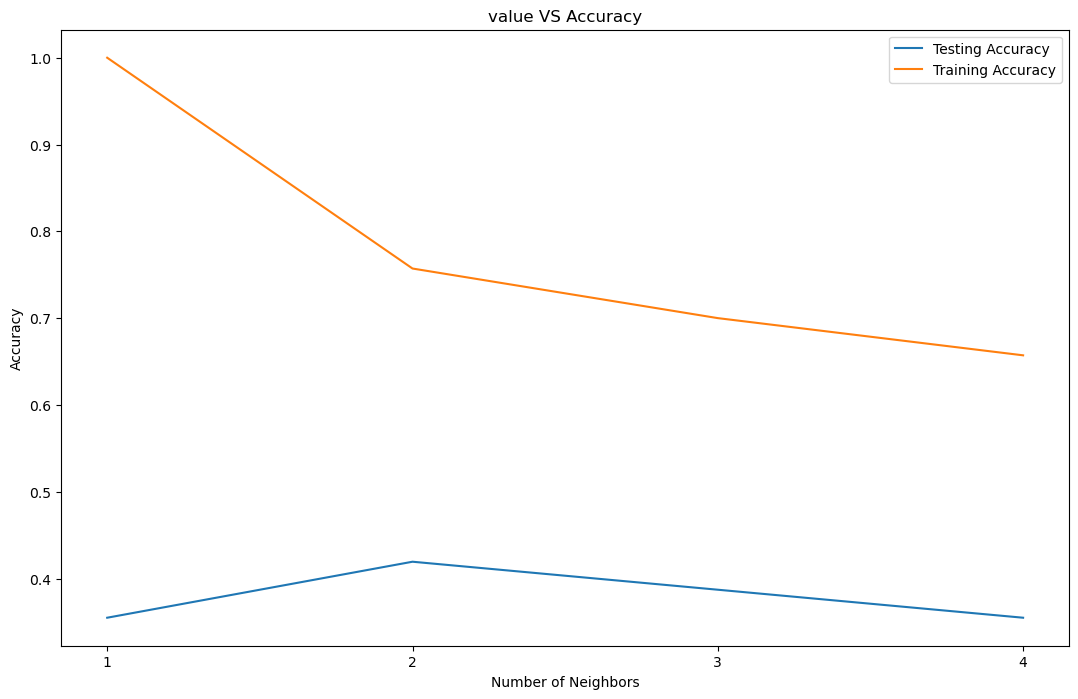

Best accuracy is 0.41935483870967744 with K = 2


In [39]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, training_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))